In [1]:
#Importing the necessary libraries
#Data wrangling
import pandas as pd
import numpy as np
#Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
#Data Clustering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
#Suppressing warnings
import warnings
warnings.filterwarnings('ignore')
#Operating system interaction 
import os

In [2]:
#df=pd.read_csv('stores_sales_forecasting1.csv')
df = pd.read_excel(r"C:\Users\HP\Desktop\ml_project\stores_sales_forecasting.xlsx")


In [3]:
 # Renaming the column for easier access
df.columns = df.columns.str.replace(' ', '_')

In [4]:
#checking data types
print(df.dtypes)

Row_ID                    int64
Order_ID                 object
Order_Date       datetime64[ns]
Ship_Date        datetime64[ns]
Ship_Mode                object
Customer_ID              object
Customer_Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal_Code               int64
Region                   object
Product_ID               object
Category                 object
Sub-Category             object
Product_Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object


In [5]:
#Checking for missing data
df.isnull().sum()

Row_ID           0
Order_ID         0
Order_Date       0
Ship_Date        0
Ship_Mode        0
Customer_ID      0
Customer_Name    0
Segment          0
Country          0
City             0
State            0
Postal_Code      0
Region           0
Product_ID       0
Category         0
Sub-Category     0
Product_Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [6]:
# Extracting the month from the 'Order Date' and creating a new column 'Order_Month'
df['Order_Month'] = df['Order_Date'].dt.month
df['Order_Month'] = df['Order_Month'].astype(int)

In [7]:
# Rounding Sales and Profit to two decimal places
df[['Sales','Profit']] = df[['Sales','Profit']].round(2)

In [8]:
#Quick data inspection
df.head(10)

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Region,Product_ID,Category,Sub-Category,Product_Name,Sales,Quantity,Discount,Profit,Order_Month
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.00,41.91,11
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.00,219.58,11
2,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.58,5,0.45,-383.03,10
3,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7,0.00,14.17,6
4,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.18,9,0.20,85.31,6
5,24,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,...,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.37,2,0.30,-1.02,7
6,25,CA-2015-106320,2015-09-25,2015-09-30,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,...,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.63,3,0.00,240.26,9
7,28,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.43,7,0.50,-1665.05,9
8,30,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,East,FUR-FU-10004848,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",124.20,3,0.20,15.52,9
9,37,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.92,5,0.60,-147.96,12


In [9]:
#Grouping the data by 'Order_Month' and summing the 'Sales'
Monthly_Sales = df.groupby('Order_Month')['Sales'].sum().reset_index()
print(Monthly_Sales)

    Order_Month      Sales
0             1   31569.26
1             2   15765.90
2             3   50768.30
3             4   40698.56
4             5   48365.14
5             6   52999.43
6             7   49377.02
7             8   44884.00
8             9  106380.61
9            10   58087.55
10           11  121286.00
11           12  121817.96


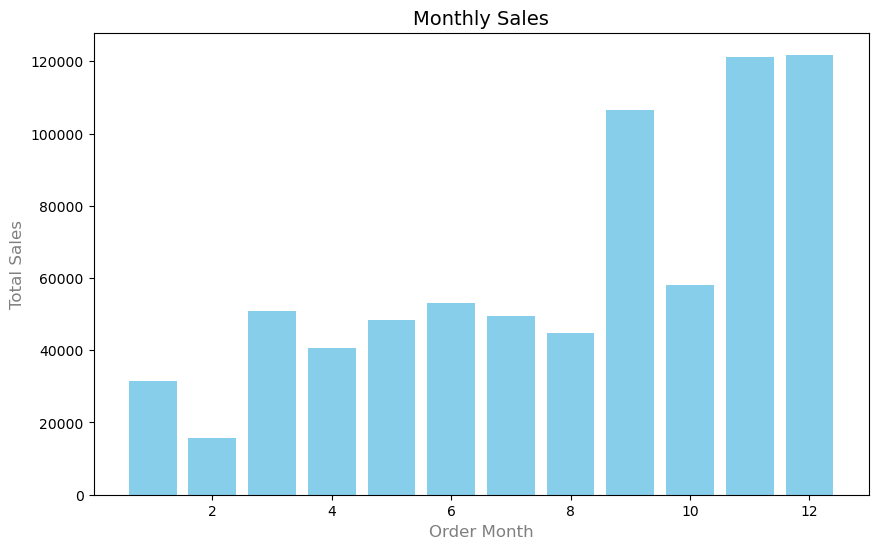

In [10]:
#Visualing the Sales by Order_Month
plt.figure(figsize=(10,6))
plt.bar(Monthly_Sales['Order_Month'], Monthly_Sales['Sales'], color='skyblue')
plt.title('Monthly Sales', fontsize=14)
plt.xlabel('Order Month', fontsize=12, alpha=0.5)
plt.ylabel('Total Sales', fontsize=12,alpha=0.5)
plt.show()

In [11]:
df=df.drop(columns=['Row_ID','Order_ID','Customer_ID','Customer_Name','Postal_Code'])

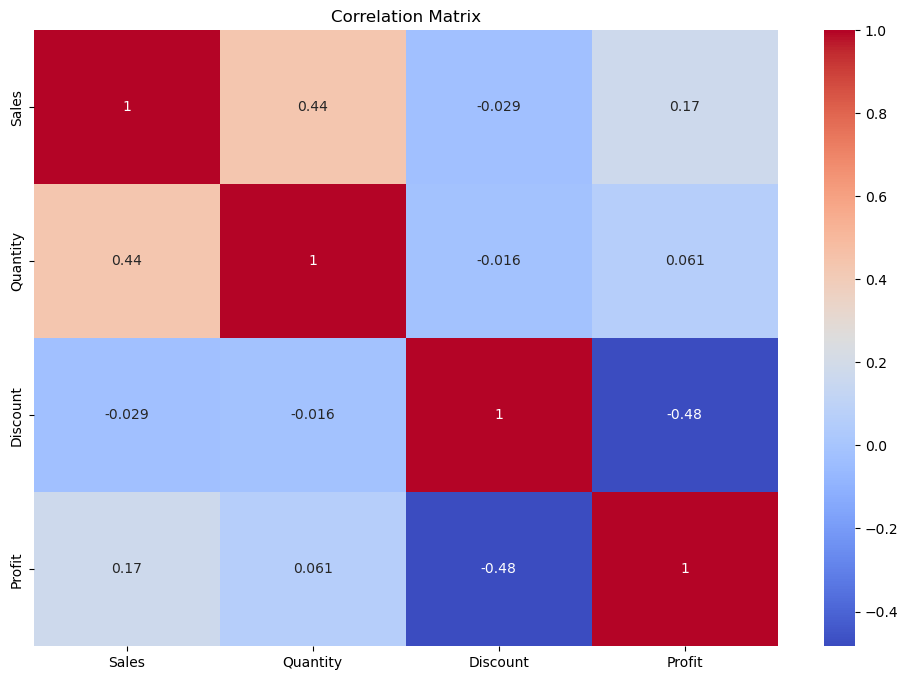

In [12]:
#Creating the correlation matrix to analyze variables for prediction
 #Selecting only the numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
#Apply log transformation to 'Profit' and 'Sales'
df['Log_Profit'] = np.log(df['Profit']+1)
df['Log_Sales'] = np.log(df['Sales']+1)

df.loc[3, 'Log_Profit'] = np.nan  

mean_value = df['Log_Profit'].mean()  
df['Log_Profit'].fillna(mean_value, inplace=True) 

In [14]:
#Selecting features with Sales as the target variable
X = df[['Quantity', 'Discount', 'Log_Profit']]  
y = df['Log_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
#Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
#Training a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [17]:
#Predicting on test data
y_pred_rf = rf_model.predict(X_test_scaled)

In [18]:
# Evaluating the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R²: {r2_rf}')

Random Forest Mean Squared Error: 0.45071648503642014
Random Forest R²: 0.7884316895449465


In [19]:
#Importing hyperparameter tuning technique such as GridSearch for Random Forest
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)
# Best parameters found
print(f'Best Parameters: {grid_search.best_params_}')

Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 300}


In [20]:
# Evaluating the tuned model
best_rf_model = grid_search.best_estimator_
y_pred_tuned = best_rf_model.predict(X_test_scaled)

mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f'Tuned Model Mean Squared Error: {mse_tuned}')
print(f'Tuned Model R²: {r2_tuned}')

Tuned Model Mean Squared Error: 0.42119943831572904
Tuned Model R²: 0.8022871217548753


In [21]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf_model, X, y, cv=10, scoring='r2')  # 5-fold cross-validation

# Print out the cross-validation results
print(f'Cross-validation R² scores: {cv_scores}')
print(f'Mean R² score: {cv_scores.mean()}')
print(f'Standard deviation of R² scores: {cv_scores.std()}')

Cross-validation R² scores: [0.75887839 0.82496854 0.79555441 0.78936229 0.77479255 0.81388923
 0.81008935 0.79453582 0.77093606 0.82784616]
Mean R² score: 0.7960852801576548
Standard deviation of R² scores: 0.022077564182081434


In [22]:
# Making predictions for the test set
y_pred = rf_model.predict(X_test_scaled) 

In [23]:
# Calculating residuals
residuals = y_test - y_pred

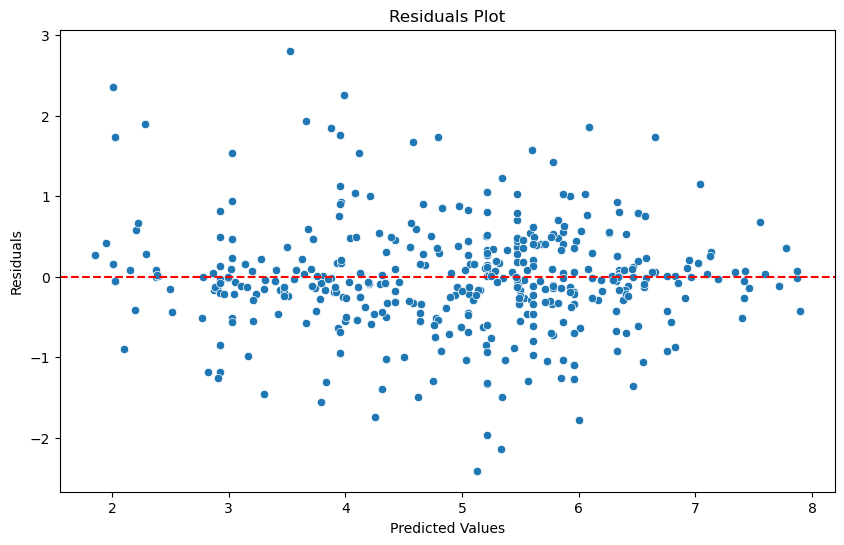

In [24]:
# Plotting residuals vs predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()